We want to replicate the author's data from the lcfit package to make sure the implementation of lcfit on the new data is correct. we start off with implementing the tests provided in the package to see how the model works:


## The first test:


There are two inputs for this test :
 1. a list
 2. a photometric time series directory.





 

##### The list input:

the first test has a list file test1.lst which consist of 3 RRL stars from the OGLE-IV survey. This list shows the id and period of these stars.
This list acts like a sort of metadata.

##### The photometric time series directory:
this directory includes 3 .dat files corresponding to each star. inside this files we have a times series, their values, and the value errors.sometimes for each time we have many values and their errors which shows that the suvery has been conducted with different photometric aperture sizes.

In [29]:
import pandas as pd
import io
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]


In [14]:
file_path = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test1.lst'

data = []
with open(file_path, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

test1_lst = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ')
test1_lst.drop(columns= 'Unnamed: 1', inplace= True)
test1_lst

,id,period
0,b56841,0.580855
1,b57131,0.537362
2,b21314,0.562962


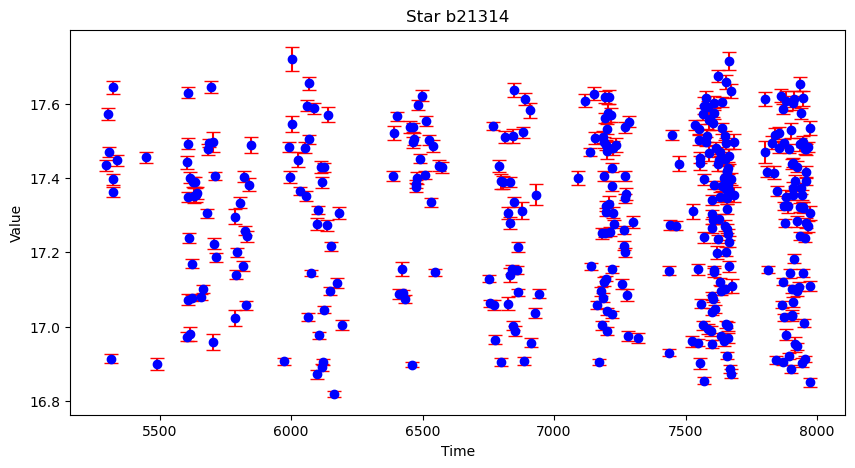

In [31]:
file_path_14 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b21314.dat'

data = []
with open(file_path_14, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b21314 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b21314.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b21314

plt.errorbar(b21314.Time, b21314.Value, yerr=b21314.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b21314')

# Display the plot
plt.show()



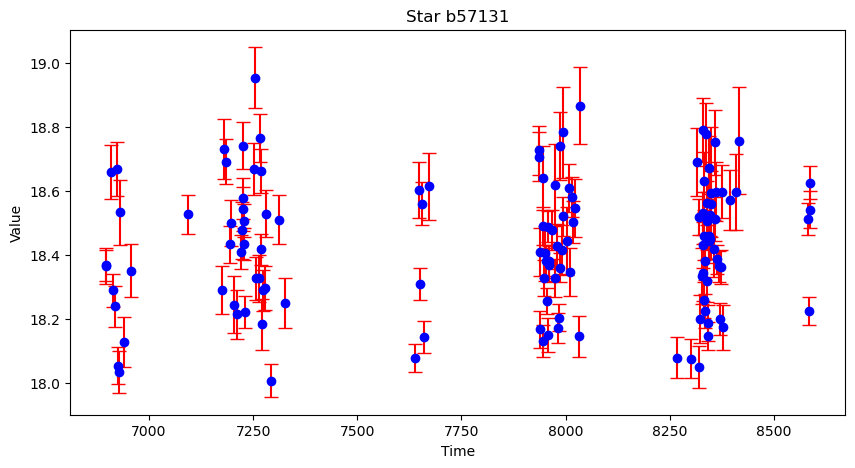

In [32]:
file_path_31 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b57131.dat'

data = []
with open(file_path_31, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b57131 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b57131.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b57131

plt.errorbar(b57131.Time, b57131.Value, yerr=b57131.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b57131')

# Display the plot
plt.show()


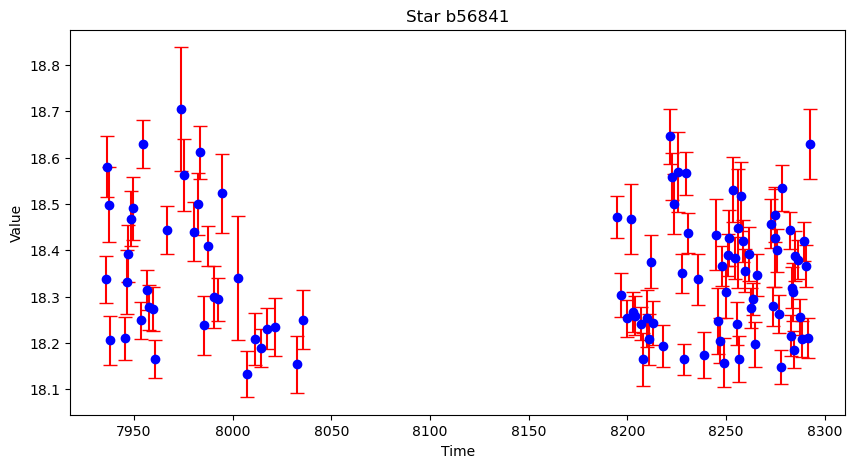

In [34]:
file_path_41 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b56841.dat'

data = []
with open(file_path_41, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b56841 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b56841.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b56841

plt.errorbar(b56841.Time, b56841.Value, yerr=b56841.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b56841')

# Display the plot
plt.show()

Now we want to process these light curves and make them phase-folded with lcfit package. We have to change the lcfit parameter file like this :

parameter file `lcfit.par`:

`--input_list test1.lst --input_dir test_photometry --n_data_cols 1 
--use_data_cols 1 --is_err_col`


In [36]:
!python lcfit.py @lcfit.par

python: can't open file '/Users/melikakeshavarz/Desktop/Thesis_notebooks/lcfit.py': [Errno 2] No such file or directory
